# Modeling

Tahap Modeling bertujuan untuk membangun model klasifikasi
yang mampu membedakan jenis burung
berdasarkan fitur MFCC yang telah diekstraksi
pada tahap preprocessing.

Model yang digunakan pada penelitian ini adalah
**Support Vector Machine (SVM)**,
karena SVM efektif untuk dataset berukuran kecil
dan mampu menangani klasifikasi non-linear.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


Mounted at /content/drive


## 1. Memuat Data Hasil Preprocessing

Pada tahap ini, data yang digunakan adalah
hasil preprocessing berupa fitur MFCC
dan label yang telah diencoding.

Data ini dimuat dari file yang telah disimpan
pada tahap preprocessing.


In [3]:
PREP_DIR = "/content/drive/MyDrive/MATKUL/PSD/UAS/preprocessed_data"

data = np.load(os.path.join(PREP_DIR, "mfcc_features.npz"))

X_train_feat = data["X_train"]
X_test_feat  = data["X_test"]
y_train_enc  = data["y_train"]
y_test_enc   = data["y_test"]

with open(os.path.join(PREP_DIR, "label_encoder.pkl"), "rb") as f:
    le = pickle.load(f)




## 2. Feature Scaling

Sebelum melatih model SVM,
fitur MFCC perlu dinormalisasi
menggunakan **StandardScaler**.

Hal ini penting karena:
- MFCC memiliki skala yang berbeda antar koefisien
- SVM sensitif terhadap perbedaan skala fitur
- Scaling membantu proses pencarian hyperplane optimal


StandardScaler melakukan standardisasi fitur dengan rumus:

$$z = \frac{x - \mu}{\sigma}$$

di mana:
- $x$ = nilai fitur
- $\mu$ = rata-rata fitur
- $\sigma$ = standar deviasi fitur

Standardisasi dilakukan **per fitur**, bukan per sampel.

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

print("Scaling selesai")


Scaling selesai


## 3. Visualisasi Feature Setelah Scaling

Visualisasi dilakukan untuk memastikan bahwa
fitur hasil scaling memiliki distribusi
yang terpusat di sekitar nol.


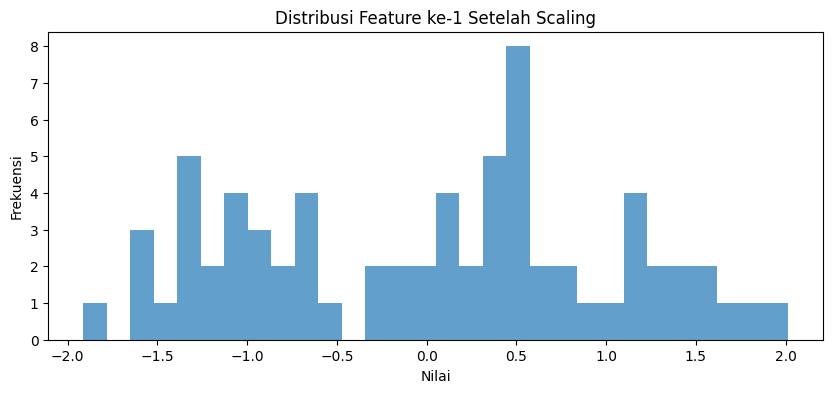

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(X_train_scaled[:, 0], bins=30, alpha=0.7)
plt.title("Distribusi Feature ke-1 Setelah Scaling")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()


## 4. Definisi Model Support Vector Machine (SVM)

Support Vector Machine bekerja dengan mencari hyperplane
yang memaksimalkan margin antar kelas.

Karena data MFCC tidak dapat dipisahkan secara linear,
digunakan **kernel Radial Basis Function (RBF)**.


SVM meminimalkan fungsi objektif:

$$\min \frac{1}{2} ||w||^2 + C \sum \xi_i$$

Kernel RBF didefinisikan sebagai:

$$K(x, x') = \exp(-\gamma ||x - x'||^2)$$

di mana:
- $C$ mengontrol trade-off antara margin dan error
- $\gamma$ mengontrol radius pengaruh satu sampel

In [5]:
svm = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    probability=True,
    class_weight="balanced",
    random_state=42
)


## 5. Training Model

Model SVM dilatih menggunakan data training
yang telah melalui proses scaling.


In [6]:
svm.fit(X_train_scaled, y_train_enc)

print("Training SVM selesai")


Training SVM selesai


## 6. Evaluasi Awal pada Data Training

Evaluasi awal dilakukan pada data training
untuk memastikan bahwa model berhasil mempelajari pola data.


In [7]:
train_acc = svm.score(X_train_scaled, y_train_enc)
print("Train accuracy:", train_acc)


Train accuracy: 1.0


## 7. Penyimpanan Model

Model dan scaler disimpan
agar dapat digunakan kembali
pada tahap evaluasi dan deployment (Streamlit).


In [ ]:
MODEL_DIR = "/content/drive/MyDrive/MATKUL/PSD/UAS/model_svm_mfcc"
os.makedirs(MODEL_DIR, exist_ok=True)

with open(os.path.join(MODEL_DIR, "svm_mfcc_model.pkl"), "wb") as f:
    pickle.dump(svm, f)

with open(os.path.join(MODEL_DIR, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

print("Model & scaler disimpan ke:", MODEL_DIR)
MODEL_DIR = "/content/drive/MyDrive/MATKUL/PSD/UAS/model_svm_mfcc"
os.makedirs(MODEL_DIR, exist_ok=True)

with open(os.path.join(MODEL_DIR, "svm_mfcc_model.pkl"), "wb") as f:
    pickle.dump(svm, f)

with open(os.path.join(MODEL_DIR, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

print("Model & scaler disimpan ke:", MODEL_DIR)


## 8. Kesimpulan Tahap Modeling

Kesimpulan tahap modeling:
1. Fitur MFCC berhasil distandarisasi menggunakan StandardScaler
2. Model SVM dengan kernel RBF berhasil dilatih
3. Model menunjukkan performa sangat baik pada data training
4. Model dan scaler telah disimpan untuk tahap evaluasi dan deployment
